# Assignment 4 - Unsupervised Learning and Neural Networks

## *Nathan Warren*
Netid: naw32

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (c) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

**ANSWER**

In [395]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

In [994]:
# Used for assistance: http://madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustering-from-scratch-in-python.html

# 1. Select k and randomly initialize k means values
# 2. Assign observations to nearest mean
# 3. Update the mean to be the centroid of the labeled data
# 4. Repeat steps 2 and 3 till convergence
# Dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean

def kmeans(X, k, max_steps, convergence_threshold = 0.0001):
    '''kmeans
        Input:
            X: matrix of input data where each row represents a sample
            k: number of means to use
            max_steps: maximum number of iterations to run the algorithm
            convergence_threshold: if the means change less than this
                                   value in an iteration, declare convergence
        Output:
            means: a matrix listing the k means
            cluster_assignment: a list of the cluster assignments for each samples
            dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean
    '''
    # 1. Select k and randomly initialize k means values (select random centroid for each cluster)
    means = X[np.random.choice(X.shape[0], k, replace=False)]
    diff = 10
    step = 0
    mean_new = []
    
    # 2. Assign observations to nearest mean
    while(convergence_threshold < diff):
        label_list = []
        class_dict = {}
        
        # making lists within a dict for each cluster/class
        for i in range(k):
            class_dict[i]=[]
        
        for obs in X:
            # L2 distance between obs and mean
            dist = [np.linalg.norm(obs - cent) for cent in means]
            #print(dist)
            
            # Use minimum distance to label centroid for points
            min_mean_label = (dist.index(min(dist)))
            #print(min_mean_label) 
            
            # Add class to label_list
            label_list.append(min_mean_label)
            #print(label_list)
            
            # add to list inside dict
            class_dict[min_mean_label].append(obs)
            
        # Store old means
        means_old = np.copy(means)
        #print(means_old)
        #print(means)
        
        # Update with new means where class_dict = to classification number
        for i in class_dict:
            means[i] = np.average(class_dict[i], axis = 0)
   
        # Calculate mean diff
        diff = np.mean(np.linalg.norm(means-means_old))
        #print(diff)

        # Increase step as itterations pass
        step +=1
        
        # Stop if over max_steps
        if step > max_steps:
            break

    # Dissimilarity - calculated by taking (observation - updated centroid)^2 # have to use L2
    dissim = 0
    for i, obs in enumerate(X):
        #print(means[label_list[i]])
        dissim += (np.linalg.norm(obs - (means[label_list[i]])))**2
    #for i in range(len(X)):
        #dissim += np.sum(np.square(np.linalg.norm(dist[class_dict == i])))

    return means, label_list, dissim

In [998]:
# Testing
a,b,c = kmeans(x2, 1, 40)
c

25962.0907843579

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

In [708]:
# Clusters: one with 2 cluster centers and the other with 5, random_state = 0, 5000 samples
from sklearn.datasets.samples_generator import make_blobs

#x = samples
#y = labels
x2,y2 = make_blobs(n_samples=5000, n_features=2, centers=2, random_state=0)
x5,y5 = make_blobs(n_samples=5000, n_features=2, centers=5, random_state=0)

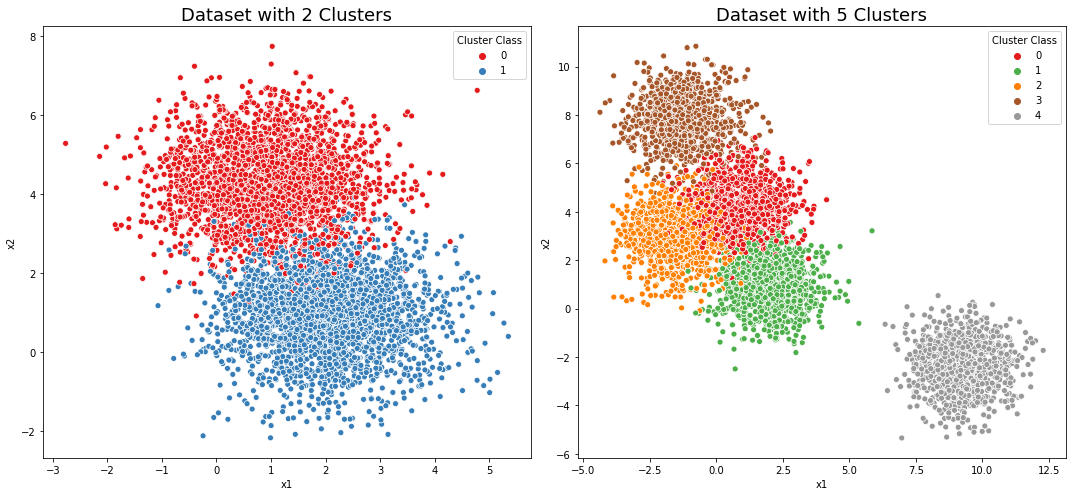

In [1050]:
# Original Data Sets Scatterplots showing clusters
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.scatterplot(x2[:, 0], x2[:, 1], hue=y2, palette='Set1')
plt.title('Dataset with 2 Clusters', size = 18)
plt.legend(title = 'Cluster Class')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1,2,2)
sns.scatterplot(x5[:, 0], x5[:, 1], hue=y5, palette='Set1', legend = "full")
plt.title('Dataset with 5 Clusters', size = 18)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(title = 'Cluster Class')
plt.tight_layout()
plt.show()

In [1047]:
# kemans returns means, label_list, dissim
# label_list = class
# k ranging from 1 to 10 and plot eblow curve for dissim in each case

dissim2 = []
kmean2 = []
dissim5 = []
kmean5 = []

#from 1-10 get dissimilarity
for k in range(1,11):
    m2, c2, d2 = kmeans(x2,k, 300, 0.0001)
    m5, c5, d5 = kmeans(x5,k, 300, 0.0001)
    dissim2.append(d2)
    dissim5.append(d5)

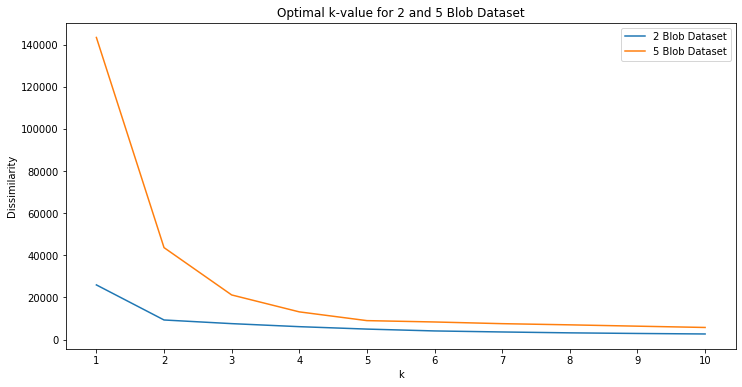

In [1048]:
#Plotting

plt.figure(figsize = (12,6))
sns.lineplot(range(1,11), dissim2, label = '2 Blob Dataset')
sns.lineplot(range(1,11), dissim5, label = '5 Blob Dataset')
plt.xticks(range(1,11))
plt.ylabel('Dissimilarity')
plt.xlabel('k')
plt.title("Optimal k-value for 2 and 5 Blob Dataset")
plt.legend()
plt.show()

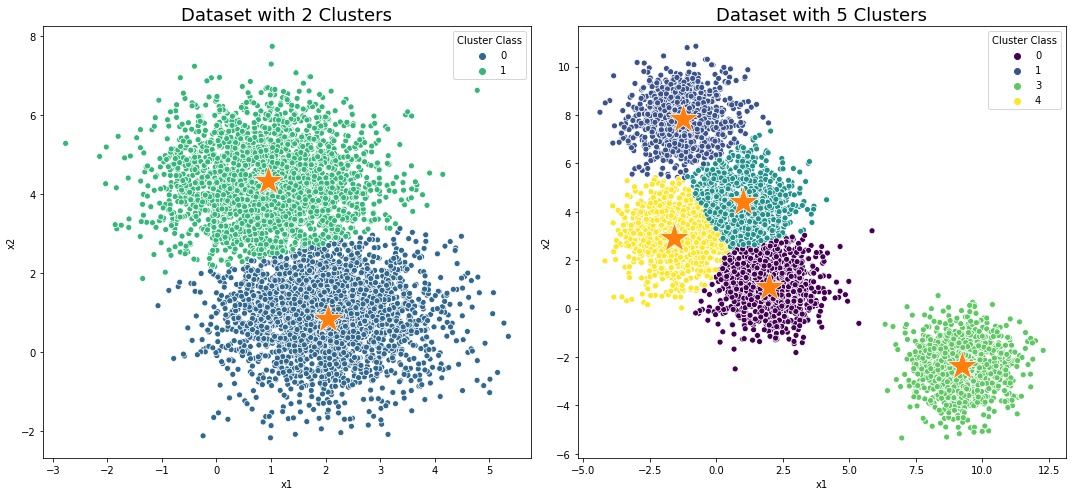

In [1059]:
m2, c2, d2 = kmeans(x2, 2, 400)
m5, c5, d5 = kmeans(x5, 5, 400)

# Plotting the clustering resutlts of k-means algo
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.scatterplot(x2[:, 0], x2[:, 1], hue=c2, palette='viridis')
sns.scatterplot(m2[:,0], m2[:,1], s = 1000, marker = "*")
plt.title('Dataset with 2 Clusters', size = 18)
plt.legend(title = 'Cluster Class')
plt.xlabel('x1')
plt.ylabel('x2')


plt.subplot(1,2,2)
sns.scatterplot(x5[:, 0], x5[:, 1], hue=c5, palette='viridis')
sns.scatterplot(m5[:,0], m5[:,1], s = 1000, marker = "*")
plt.title('Dataset with 5 Clusters', size = 18)
plt.legend(title = 'Cluster Class')
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

(1) **K-means clustering** works by initially creating k centroids randomly. Points are classified as the nearest centroid using L2 distance (or whatever distance measure is implemented). Centroid positions are updated by taking the mean of the points in the associated class. These steps are repeated until the model converges. This method assumes that clusters have similar variance and shapes. K-means clustering would not work well for non-linear clustering. 

(2) **Agglomerative clustering** first assigns each point to a separate cluster. Distance (whatever metric is define) is calculated between clusters. Pairs of clusters with the shortest distances are grouped and defined as a new cluster. This cluster grouping and creation is repeated until there is only a single cluster left, including all of the points. From the clustering data, a dendrogram can be created to allow for viewing of this hierarchical clustering. Using the dendrogram, one can decide when to discontinue the itterative process to obtain k clusters. This method struggles with non-linear clustering since distance metrics only look for the nearest points.

(3) **Gaussian mixture models** are initialized with k randomly generated Gaussian distributions. Expectation maximization is used only the data to find the model parameters of each Gaussian. For each observation, probability is calculated of that observation beloning to each Gaussian. Each cluster then has it's mean and covariance matrix updated based on the observations assigned to each distribution. These steps are repeated in order to maximize the log-likelihood. Gaussian mixture models can produce soft clustering, in which observations can belong to more than one cluster. Gaussian mixture models work well for observations that are correlated. Gaussian mixture models do not work well for non-Gaussian distributed clusters.

(4) **DBSCAN** initially divides the dataset into n dimensions. DBSCAN then forms an n dimensional shape around each point and counts how many data points fall within that shape. DBSCAN uses two parameters, the distance threshold, $\epsilon$ and the minimum number of points. For each n-dimensional shape around each point, the number of points within the distance threshold, $\epsilon$, is recorded. Using the number of neighbors and the distance to these points, core points, border points, and outliers are assigned. Border points do not have enough MinPts surrounding them but are in the n-dimensional space of a core point. If a point has fewer neighbors than MinPts, and is outside the n-dimensional shape, it will be defined as an outlier. This algorithm is able to handle outliers and makes no assumption about cluster shapes, however, variation in cluster density is not handled well.


(5) **Spectral clustering** initially calculates a similarity graph based on the similarity of points to each other. A common way to define similarity is with a Gaussian. Once this graph is created, an affinity matrix can be created. Using this affinity matrix, principle components can be extracted to reduce the dimensionality of the data. Points are re-mapped on this lower dimension. From here, any sort of clustering technique, such as k-means, can be used to cluster the observations. The method used allows for non-linear clustering as it focuses on connectedness rather than compactness (which is used in the algorithms above, measured by L2 distance or density). This method can be slow for large datasets.


**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (c) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset).

In [223]:
# User x1 and x2 (first two columns)
import os

# Load 4 datasets
os.chdir("/Users/N1/Desktop/705 - ML/705_LOCAL/Assignment 4")
aggregation = pd.read_csv("Aggregation.txt", delimiter = '\t', header = None, names = ["x1", "x2", "y"])
compound = pd.read_csv("Compound.txt", delimiter = '\t', header = None, names = ["x1", "x2", "y"])
D31 = pd.read_csv("D31.txt", delimiter = '\t', header = None, names = ["x1", "x2", "y"])
jain = pd.read_csv("jain.txt", delimiter = '\t', header = None, names = ["x1", "x2", "y"])

# Drop y in each dataset
aggregation = aggregation.drop('y', axis = 1)
compound = compound.drop('y', axis = 1)
D31 = D31.drop('y', axis = 1)
jain = jain.drop('y', axis = 1)

#Make list of all datasets for iterating over later
dataset = [aggregation, compound, D31, jain]
datasets_name = ["Aggregation", "Compound", "D31", "Jain"]

#This is k for each corresponding dataset
k_list = [7, 6, 31, 2]

# Dictionary
data_dict = dict(zip(datasets_name, k_list))

# Algorithm names for plotting
Algorithms = ['K-means', "Agglomerative Clustering", 'Gaussian Mixture', 'DBSCAN', 'Spectral Clustering']

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

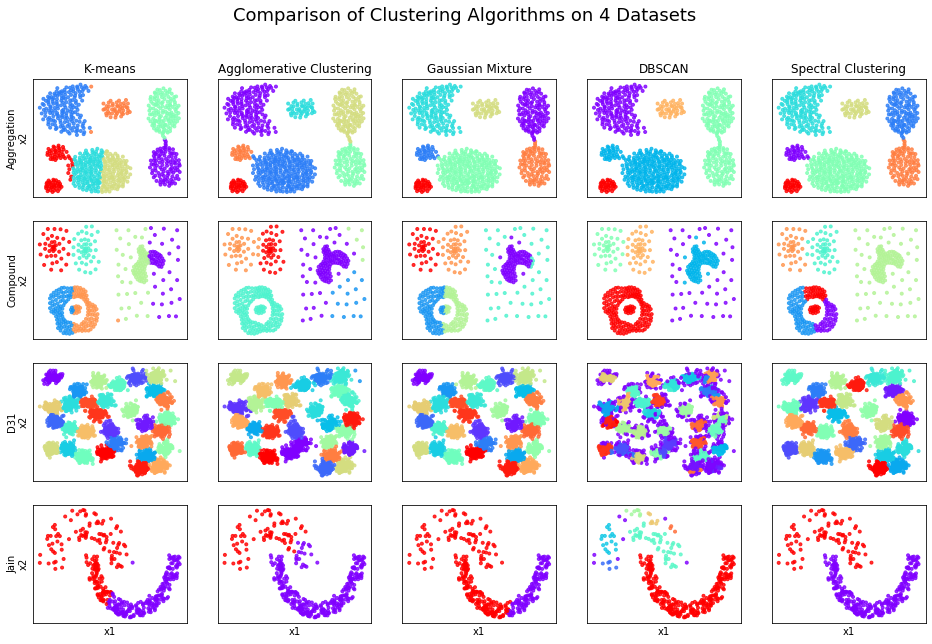

In [16]:
# Plotting of all clustering methods 4x5 subplot

# For GMM
cov_type = ['full', 'spherical', 'full', 'full']

# For DBSCAN
eps_set = [2, 1.8, 0.3, 2]
min_samp = [3, 6, 3, 3]

# Plotting
nrows, ncols = 4,5
fig, ax = plt.subplots(nrows, ncols, figsize = (16,10))

# Get rid of tick marks and associated labels
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

for j in range(nrows):
    for i in range(ncols):
        
        if i == 0: # k-means
            KM = KMeans(n_clusters=k_list[j], random_state=0)
            data = dataset[j]
            labs = KM.fit_predict(data)
            name = datasets_name[i]
            ax[j,i].scatter(data['x1'], data['x2'], c = labs, cmap = 'rainbow', marker = '.', alpha = 0.8)
                
        elif i == 1: #AgglomerativeClustering
            AC = AgglomerativeClustering(n_clusters=k_list[j], linkage = 'average')
            data = dataset[j]
            labs = AC.fit_predict(data)
            ax[j,i].scatter(data['x1'], data['x2'], c = labs, cmap = 'rainbow', marker = '.', alpha = 0.8)
                  
        elif i == 2: # GMM
            GMM= GaussianMixture(n_components = k_list[j], n_init = 10, random_state=0, covariance_type = cov_type[j])
            data = dataset[j]
            labs = GMM.fit_predict(data)
            ax[j,i].scatter(data['x1'], data['x2'], c = labs, cmap = 'rainbow', marker = '.', alpha = 0.8)
                   
        elif i == 3: # DBSCAN
            DB = DBSCAN(eps=eps_set[j], min_samples = min_samp[j])
            data = dataset[j]
            labs = DB.fit_predict(data)
            ax[j,i].scatter(data['x1'], data['x2'], c = labs, cmap = 'rainbow', marker = '.', alpha = 0.8)
                      
        else: # Spectral Clustering
            SC = SpectralClustering(n_clusters=k_list[j], random_state=0)
            data = dataset[j]
            labs = SC.fit_predict(data)
            ax[j,i].scatter(data['x1'], data['x2'], c = labs, cmap = 'rainbow', marker = '.', alpha = 0.8)
            
            
fig.suptitle("Comparison of Clustering Algorithms on 4 Datasets", size = 18)

# Axis labels
for i in range(ncols): 
    ax[j,i].set(xlabel = 'x1')
    ax[0,i].set_title(Algorithms[i])
    
for j in range(nrows):
    ax[j,0].set(ylabel = datasets_name[j] +'\nx2')

plt.show()

Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset).

1) **Aggregation Dataset**

For the aggregation dataset, it appears the k-means did the worst job of classifying, as one of the largest "clusters", to the human eye, is clearly split as 3 clusters. The rest of the algorithms performed very similar to one another. This is likely due to the fact that k-means assumes that all blobs have similar shape and spherical variance. 

2) **Compound Dataset**

None of the algorithms performed perfectly on this dataset, although it appears that DBSCAN performed the best. DBSCAN performed well as DBSCAN makes no assumption about cluster shapes. 

3) **D31 Dataset**

For the 31 blobs in this data set, all algorithms except DBSCAN performed well. DBSCAN likely performed badly since its difficult for DBSCAN to label core and boundary points due to how close blobs are to one another. The other 4 algorithms all have adjacent clusters that are in the same cluster. If I had to choose I would say K-means works best for the data, likely because all the clusters are approximately the same shape and have around the same variance.

4) **Jain Dataset**

Spectral clustering performed best in clustering this dataset, likely due to the ability to the algorithm's ability to use similarity to define clusters. Non-linear boundaries are not a problem for spectral clustering for this reason and due to the fact that dimensionality reduction is used. Since spectral clustering does not depend on blob shape and variance, this makes it effective at clustering the two moons.


## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

**ANSWER**

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

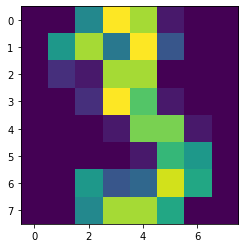

In [43]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load dataset
digits = load_digits()

# Making sure data set loaded correctly
plt.imshow(digits.images[3])
plt.show()

# Reduce to 2-D space
pca = PCA(n_components = 2)
digits_2D = pca.fit_transform(digits.data)

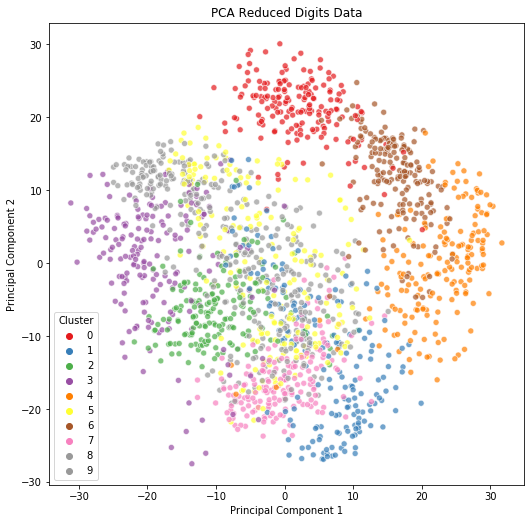

In [166]:
# Plot
plt.figure(figsize = (8.5,8.5))
sns.scatterplot(digits_2D[:,0], digits_2D[:,1], hue = digits['target'], palette = 'Set1', legend = 'full', alpha = 0.7)
plt.title('PCA Reduced Digits Data')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title = 'Cluster')
plt.show()

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

In [52]:
# Plot of cumulative fraction of variance explained (PCs) from 1 to D PCs. 
# To see how much variance is explained by the first two PCs
twoPC = pca.explained_variance_ratio_
twoPC = twoPC[0] + twoPC[1]
print(f'Variance not explained by first two principle components: {round((1-twoPC)*100,2)}%')

Variance not explained by first two principle components: 71.49%


71.49% of the variance is unexplained by the first two principal components, suggesting that many characteristics of the data are lost by reducing down to only two dimensions/features. This will likely lead to worse clustering of the data due to information loss as the clusters would now be less distinguishable from one another. Adding more principal components(features) will imrpove clustering.

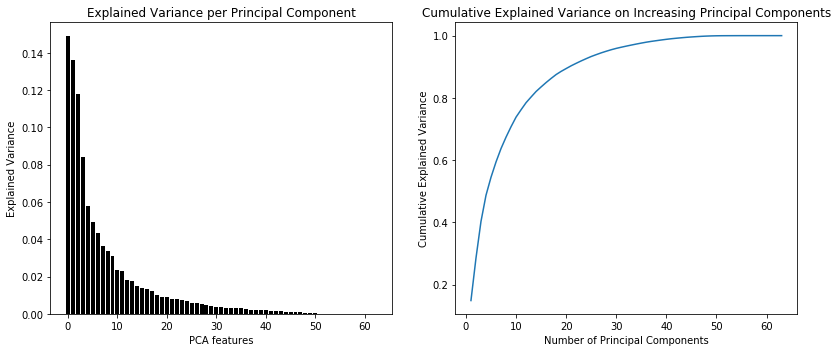

In [92]:
# Assistance from https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

#Set range of D from 1-64 (max)
D = range(1,64)
EV= []

# PCA from 1-64
for i in D:
    pca = PCA(n_components = i)
    pca.fit_transform(digits.data)
    # Add up explained variance
    EV.append(np.sum(pca.explained_variance_ratio_))
    #print(EV)

plt.figure(figsize = (12,5))
# How much variance each PC explains
plt.subplot(121)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('Explained Variance')
plt.title('Explained Variance per Principal Component')

# Plot of cumulative explained variance
plt.subplot(122)
sns.lineplot(D, EV)
plt.title("Cumulative Explained Variance on Increasing Principal Components")
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')

plt.tight_layout()
plt.show()

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

In [217]:
from sklearn.manifold import TSNE
# Perplexity = guess of # of close neighbors (expected density)
# Perplexity should be smaller than number of points
# Width of distribution is based on surrounding points
# Matrix of similarity scores before and after dimensionality reduction then try to make dim red sim matrix the same as the orig similarity matrix 
# T-distribution used

#Reduce to 2 dimensions
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, init = 'pca', random_state = 0)
tsne_results = tsne.fit_transform(digits.data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.005s...
[t-SNE] Computed neighbors for 1797 samples in 0.299s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.394135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.616806
[t-SNE] KL divergence after 1000 iterations: 0.734701


In [163]:
# Trying to get an idea of what number to use for perplexity
counts, values = np.unique(digits['target'], return_counts = True)
target_counts = dict(zip(counts, values))
target_counts

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

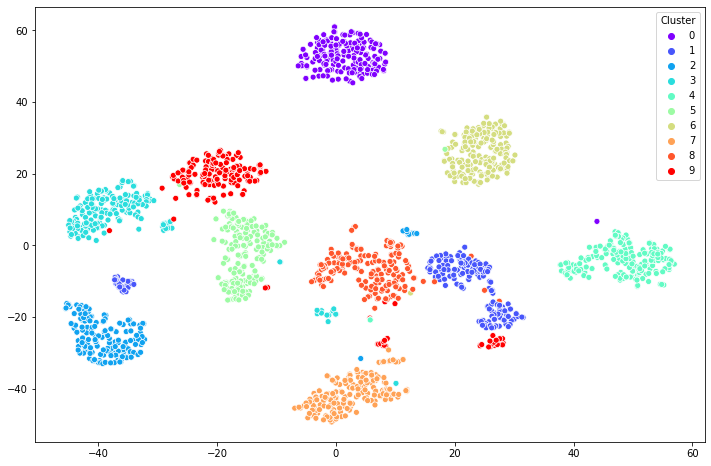

In [218]:
#Plotting
plt.figure(figsize=(12,8))
sns.scatterplot(tsne_results[:,0], tsne_results[:,1], hue = digits.target, palette = 'rainbow', legend = 'full')
plt.legend(title = 'Cluster')
plt.show()

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

t-SNE appears to have done a better job at clustering the data after reducing the dimensionality to two. Using the first two principal components led to overlapping clusters, shown in the PCA plot above. On the other hand, t-SNE apepars to have tighter clusters that are more spread out. t-SNE works by trying to group points as close as possible, based on the points characteristics, while PCA works to separate points, based on the highest varying field, out as far as possible. Since t-SNE has actually spread out the clusters better, and grouped clusters closer, better than PCA, we can say that t-SNE has performed better on this dataset, when reducing down to two dimensions.

## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved.

**ANSWER**

**(a)** Create a neural network class that follows the scikit-learn classifier convention by implementing fit, predict, and predict_proba methods. Your fit method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

In [213]:
# Used for assistance (all videos in the series): https://www.youtube.com/watch?v=UJwK6jAStmg
import numpy as np
class myNeuralNetwork(object):
    
    def __init__(self, n_in, n_layer1, n_layer2, n_out, learning_rate= 0.1):
        '''__init__
        Class constructor: Initialize the parameters of the network including
        the learning rate, layer sizes, and each of the parameters
        of the model (weights, placeholders for activations, inputs, 
        deltas for gradients, and weight gradients). This method
        should also initialize the weights of your model randomly
            Input:
                n_in:          number of inputs
                n_layer1:      number of nodes in layer 1
                n_layer2:      number of nodes in layer 2
                n_out:         number of output nodes
                learning_rate: learning rate for gradient descent
            Output:
                none
        ''' 
        # Init random seed for reproducibility
        #Choose your model architecture to have two input nodes, 
        # two hidden layers with five nodes each, and one output node.
        np.random.seed(123)
        
        # Init vars in init fct
        self.n_in = n_in
        self.n_layer1 = n_layer1
        self.n_layer2 = n_layer2
        self.n_out = n_out
        self.learning_rate = learning_rate
        
        # Init parameters (weights) using dim of layers
        self.w1  = np.random.randn(self.n_in, self.n_layer1)
        self.w2  = np.random.randn(self.n_layer1, self.n_layer2)
        self.w3 = np.random.randn(self.n_layer2, self.n_out)
        
    def forward_propagation(self, x):
        '''forward_propagation
        Takes a vector of your input data (one sample) and feeds
        it forward through the neural network, calculating activations and
        layer node values along the way.
            Input:
                x: a vector of data represening 1 sample [n_in x 1]
            Output:
                y_hat: a vector (or scaler of predictions) [n_out x 1]
                (typically n_out will be 1 for binary classification)
        '''
        # Propagate inputs through network
        # x = params
        # w = weights
        # z(2) = xw(1)
        self.z2 = np.dot(x, self.w1)
        self.a2 = self.sigmoid(self.z2)
        # (350, 2) (2, 5) (350, 5) (350, 5)
        # print(x.shape, self.w1.shape, self.z2.shape, self.a2.shape)
        
        self.z3 = np.dot(self.a2, self.w2)
        self.a3 = self.sigmoid(self.z3)        

        self.z4 = np.dot(self.a3, self.w3)
        #print(self.z4.shape)
        self.a4 = self.sigmoid(self.z4) 
        yHat = self.a4
        return yHat
        
        
    def compute_loss(self, X, y):
        '''compute_loss
        Computes the current loss/cost function of the neural network
        based on the weights and the data input into this function.
        To do so, it runs the X data through the network to generate
        predictions, then compares it to the target variable y using
        the cost/loss function
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                loss: a scalar measure of loss/cost
        '''
        # loss function
        # E = (1/2)SUM(y_hat - y)^2
        # loss for given X,y using weights previously initd
        
        # yHat from forward prop
        loss = 0
        for i in range(X.shape[0]):
            yHat = self.forward_propagation(X[i])
            loss += np.sum(0.5*(((y[i]-yHat)**2)))
        # Loss
        #print(y)
        #print(yHat)
        return loss
    
    def sigmoid(self, X):
        '''sigmoid
        Compute the sigmoid function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid function
        '''
        return 1/(1+np.exp(-X))
    
    def sigmoid_derivative(self, X):
        '''sigmoid_derivative
        Compute the sigmoid derivative function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid derivative function
        '''
        return self.sigmoid(X) * (1-self.sigmoid(X))
    
    def backpropagate(self, x, y):
        '''backpropagate
        Backpropagate the error from one sample determining the gradients
        with respect to each of the weights in the network. The steps for
        this algorithm are:
            1. Run a forward pass of the model to get the activations 
               Corresponding to x and get the loss functionof the model 
               predictions compared to the target variable y
            2. Compute the deltas (see lecture notes) and values of the
               gradient with respect to each weight in each layer moving
               backwards through the network
    
            Input:
                x: A vector of 1 samples of data [n_in x 1]
                y: Target variable [scalar]
            Output:
                loss: a scalar measure of th loss/cost associated with x,y
                      and the current model weights
        '''
        # # of w = # of gradients
        # (-y - y_hat) * f'(z) = matrix of deltas
        
        # yHat from forward prop
        yHat = self.forward_propagation(x)
        
       # dE/dyHat (inside)
        inside = yHat - y
        
        # Compute deltas, de/dw for each layer, and de/dx
        self.delta3 = inside * self.sigmoid_derivative(self.z4)
        self.dedw3 = np.dot(self.a3.T, self.delta3)
        #print(self.z4.shape, self.delta3.shape, self.a3.shape, self.dedw3.shape)
        
        #print(self.w3.T.shape, self.delta3.shape, self.z3.shape)
        # 1,5   350,350,   350,5
        self.delta2 = np.dot(self.delta3, self.w3.T) * self.sigmoid_derivative(self.z3)
        self.dedw2 = np.dot(self.a2.T, self.delta2)
        
        self.delta1 =  np.dot(self.delta2, self.w2.T) * self.sigmoid_derivative(self.z2)
        self.dedx = np.dot(x.T, self.delta1)
        
        # forward then calc loss
        # x = y_hat, y = y
        loss = self.compute_loss(x,y)
        return loss
        
    def stochastic_gradient_descent_step(self):
        '''stochastic_gradient_descent_step
        Using the gradient values computer by backpropagate, update each
        weight value of the model according to the familiar stochastic
        gradient descent update equation.
        
        Input: none
        Output: none
        '''
        self.w3 = self.w3 - (self.learning_rate * self.dedw3)
        self.w2 = self.w2 - (self.learning_rate * self.dedw2)
        self.w1 = self.w1 - (self.learning_rate * self.dedx)
    
    def fit(self, X, y, max_epochs= 1000, get_validation_loss=True, val_split = 0.3):
        '''fit
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                training_loss:   Vector of training loss values at the end of each epoch
                validation_loss: Vector of validation loss values at the end of each epoch
                                 [optional output if get_validation_loss==True]
        '''
        # Shuffle data and create training dataset
        idx = np.arange(X.shape[0])
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        #When validation_loss is set to true, split the data using val_split input
        if get_validation_loss == True:
            train_pct = int(val_split * len(X))
            X, X_val = X[train_pct:], X[:train_pct]
            y, y_val = y[train_pct:], y[:train_pct]

        # Training and validation outputs 
        training_loss = np.zeros((max_epochs,1))
        validation_loss = np.zeros((max_epochs,1))
        
        # SGD
        for i in range(max_epochs):
            train_loss = 0
            for j in range(X.shape[0]):
                #print(X_train.reshape[(-1,1)], y_train.reshape([1,-1]))
                #print(X[j])
                #print(X.shape)
                self.forward_propagation(X[j])
                train_loss += self.backpropagate(X[j].reshape([1,-1]), y[j].reshape([1,-1]))
                self.stochastic_gradient_descent_step()
            training_loss[i] = train_loss/len(y)
            if get_validation_loss == True:
                val_loss = 0
                val_loss = self.compute_loss(X_val, y_val)
                validation_loss[i] = val_loss/len(y_val)
        return training_loss, validation_loss
            
    def predict_proba(self, X):
        '''predict_proba
        Compute the output of the neural network for each sample in X, with the last layer's
        sigmoid activation providing an estimate of the target output between 0 and 1
            Input:
                X: A matrix of N samples of data [N x n_in]
            Output:
                y_hat: A vector of class predictions between 0 and 1 [N x 1]
        '''
        yHat = np.zeros((X.shape[0]))
        for i in range(len(X)):
            yHat[i] = self.forward_propagation(X[i])
            #print(X[i])
        return yHat
    
    def predict(self, X, decision_thresh=0.5):
        '''predict
        Compute the output of the neural network prediction for 
        each sample in X, with the last layer's sigmoid activation 
        providing an estimate of the target output between 0 and 1, 
        then thresholding that prediction based on decision_thresh
        to produce a binary class prediction
            Input:
                X: A matrix of N samples of data [N x n_in]
                decision_threshold: threshold for the class confidence score
                                    of predict_proba for binarizing the output
            Output:
                y_hat: A vector of class predictions of either 0 or 1 [N x 1]
        '''
        # 1 or 0
        yHat = np.zeros((X.shape[0]))
        classification = np.zeros((X.shape[0]))
        for i in range(len(X)):
            yHat[i] = self.forward_propagation(X[i])
            classification[i] = np.where(yHat[i] > decision_thresh, 1, 0)
        return classification

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.



In [214]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.model_selection import train_test_split

# 500 for train and 100 for test
X_train, y_train = make_moons(600, noise = 0.20, random_state = 222)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1666, random_state = 222)

# Make sure 100 in test
X_test.shape[0]

100

In [215]:
# Nathan's Neural Net 
# n_in, n_layer1, n_layer2, n_out, learning_rate= 0.01
NNN = myNeuralNetwork(n_in = 2, n_layer1 = 5, n_layer2 = 5, n_out = 1, learning_rate = 0.01)

In [310]:
# X, y, max_epochs= 100, learning_rate= 0.01, get_validation_loss=True, val_split = 0.3
train_loss, val_loss = NNN.fit(X_train, y_train, max_epochs = 3000, get_validation_loss = True, val_split = 0.2) 

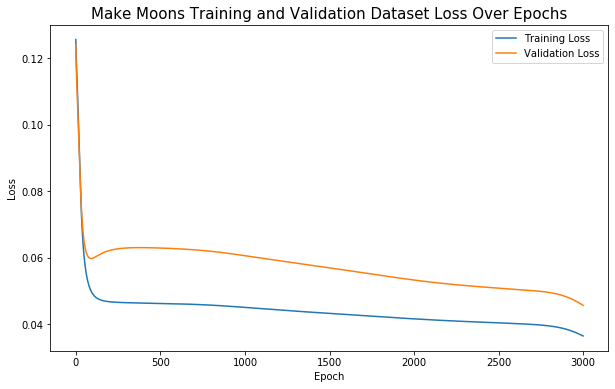

In [229]:
# Plot curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = "Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Make Moons Training and Validation Dataset Loss Over Epochs", size = 15)
plt.legend()
plt.show()

In [286]:
#Countour plot for decision boundaries

# Training Data
nvalues = 500
x1 = np.linspace(X_train[:,0].min() - 1,X_train[:,0].max() + 1, nvalues)
x2 = np.linspace(X_train[:,1].min() - 1,X_train[:,1].max() + 1, nvalues)

xx,yy = np.meshgrid(x1, x2, indexing = 'ij')
grid = np.array([xx.ravel(), yy.ravel()]).T

prob_bound = NNN.predict_proba(grid)

#Test data
nvalues = 500
x3 = np.linspace(X_test[:,0].min() - 1,X_test[:,0].max() + 1, nvalues)
x4 = np.linspace(X_test[:,1].min() - 1,X_test[:,1].max() + 1, nvalues)

xx1,yy1 = np.meshgrid(x3, x4, indexing = 'ij')
grid2 = np.array([xx1.ravel(), yy1.ravel()]).T

prob_bound2 = NNN.predict_proba(grid2)

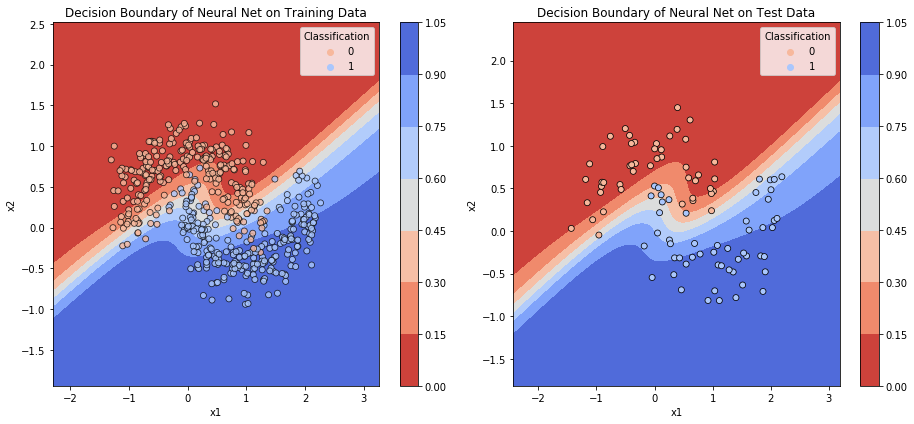

In [309]:
#Subplots of Train and Test data with decision boundary
plt.rcParams['patch.edgecolor'] = 'black'
#Training Data
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.contourf(xx, yy, prob_bound.reshape(xx.shape), cmap='coolwarm_r')
sns.scatterplot(X_train[:,0], X_train[:,1], color = 'black', alpha = 0.8, hue = y_train, palette = 'coolwarm_r', edgecolor = 'black')
plt.title("Decision Boundary of Neural Net on Training Data")
plt.xlabel("x1")
plt.legend(title = 'Classification')
plt.colorbar()
plt.ylabel("x2")

# Test Data
plt.subplot(122)
plt.contourf(xx1, yy1, prob_bound2.reshape(xx1.shape), cmap='coolwarm_r')
sns.scatterplot(X_test[:,0], X_test[:,1], color = 'black', hue = y_test, palette = 'coolwarm_r', edgecolor = 'black')
plt.title("Decision Boundary of Neural Net on Test Data")
plt.xlabel("x1")
plt.legend(title = 'Classification')
plt.colorbar()
plt.ylabel("x2")

plt.tight_layout()
plt.show()

Report your performance on the test data with an ROC curve and compare against the scikit-learn MLPClassifier trained with the same parameters.

In [370]:
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier 

# Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.
WWW = MLPClassifier(hidden_layer_sizes = (5,5), activation='logistic', batch_size=1,solver='sgd',learning_rate='constant', learning_rate_init=0.01, max_iter=3000, verbose=False) 

# Fit NN model from sklearn with test data
WWW.fit(X_train, y_train)

# Both models on test data
WWWpred_prob = WWW.predict_proba(X_test)[:,1]
NNNpred_prob = NNN.predict_proba(X_test)

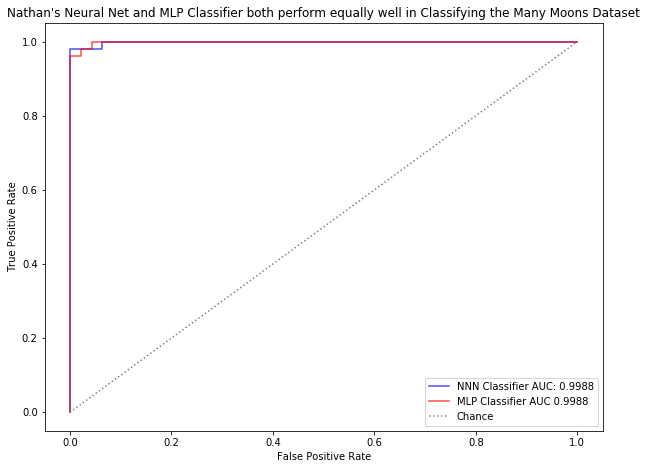

In [368]:
# Use fpr and tpr to plot ROC curve
fpr, tpr, threshold = roc_curve(y_test, NNNpred_prob.ravel())
fprW, tprW, thresholdW = roc_curve(y_test, WWWpred_prob.ravel())

n1 = roc_auc_score(y_test, NNNpred_prob.ravel())
w1 = roc_auc_score(y_test, WWWpred_prob.ravel())

# NATHANS NEURAL NET VS MATPLOTLIB CLASSIFIER
plt.figure(figsize=(10,7.5))
plt.plot(fpr, tpr, color = 'blue', label = f'NNN Classifier AUC: {round(n1,5)}', alpha = 0.7)
plt.plot(fprW, tprW, color = 'red', label = f'MLP Classifier AUC {round(w1,5)}', alpha = 0.7)
plt.plot([0, 1], [0, 1], linestyle=':', color='grey',label='Chance')
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Nathan's Neural Net and MLP Classifier both perform equally well in Classifying the Many Moons Dataset")

plt.show()

Based on the ROC plot shown above, both algorithms do an extremly well job at classifying the Many Moons test dataset. Both algorithms scores the exact same AUC score (I checked up to 15 decimal places), of 0.998. However, while both algorithms did have the same AUC score, they do slightly vary as shown on the ROC curves above. Looking at the metrics, located below, Nathan's Neural Net boasted an accuracy of 0.99, while the MPL Classifier only scored 0.91. Precision and recall are also higher for NNN for both class 0 and class 1. 

In [393]:
print("Metrics for Nathan's Neural Net on Test Dataset\n")
NNNpredict = NNN.predict(X_test)
print(classification_report(y_test, NNNpredict))

Metrics for Nathan's Neural Net on Test Dataset

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.98      0.99        53

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [394]:
print("Metrics for MPL Classifier on Test Dataset\n")
WWWpredict = WWW.predict(X_test)
print(classification_report(y_test, WWWpredict))

Metrics for MPL Classifier on Test Dataset

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        47
           1       0.96      0.87      0.91        53

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



**(c)** Suggest two ways in which you neural network implementation could be improved.

1. Regularization could be used to reduce overfitting. Regularization techniques that could be used are Lasso, Ridge, and Dropout. 
2. Adjusting the hyperparamenters should allow me to achieve a higher AUC. Hyperparameteres include learning rate, epochs, activation function, and numbers of layers and nodes in the network.